# Pizza Sales EDA Project

# Here are some questions that we'd like to be able to answer:

    1. What days and times do we tend to be busiest?
    2. How many pizzas are we making during peak periods?
    3. What are our best and worst-selling pizzas?
    4. What's our average order value?
    5. How well are we utilizing our seating capacity? (we have 15 tables and 60 seats)

In [2]:
# importing libraries 

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import datetime
import time
import seaborn as sns
import os
import zipfile


In [3]:
# Driver function

if __name__ == "__main__":
    for (root,dirs,files) in os.walk('.', topdown=True):
        print(root)
        print(dirs)
        print (files)
        print ('--------------------------------')

.
['.ipynb_checkpoints']
['.DS_Store', 'Data Model - Pizza Sales.xlsx', 'Data Model - Pizza Sales.xlsx.zip', 'PizzaSales.ipynb']
--------------------------------
./.ipynb_checkpoints
[]
['PizzaSales-checkpoint.ipynb']
--------------------------------


In [84]:
# unzip zip file 

with zipfile.ZipFile("Data Model - Pizza Sales.xlsx.zip","r") as z:
    z.extractall(".")


In [85]:
# read dataset

df = pd.read_excel("Data Model - Pizza Sales.xlsx")
df.head()

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [86]:
# checking dataset info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_details_id   48620 non-null  int64         
 1   order_id           48620 non-null  int64         
 2   pizza_id           48620 non-null  object        
 3   quantity           48620 non-null  int64         
 4   order_date         48620 non-null  datetime64[ns]
 5   order_time         48620 non-null  object        
 6   unit_price         48620 non-null  float64       
 7   total_price        48620 non-null  float64       
 8   pizza_size         48620 non-null  object        
 9   pizza_category     48620 non-null  object        
 10  pizza_ingredients  48620 non-null  object        
 11  pizza_name         48620 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 4.5+ MB


In [87]:
# checking for nulls

df.isnull().sum()

order_details_id     0
order_id             0
pizza_id             0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

In [88]:
# checking for duplicates in data

df.duplicated().sum()

0

In [89]:
# statistics of data

df.describe()

,order_details_id,order_id,quantity,unit_price,total_price
count,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,16.494132,16.821474
std,14035.529381,6180.119770,0.143077,3.621789,4.437398
min,1.000000,1.000000,1.000000,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,35.950000,83.000000


In [90]:
# extracting the date parts from order_date

df['year'] = pd.DatetimeIndex(df['order_date']).year

df['month'] = pd.DatetimeIndex(df['order_date']).month_name()

df['weekday'] = pd.DatetimeIndex(df['order_date']).day_name()


In [92]:
# extracting hour from order_time

df['order_hour'] = df['order_time']
for i in range(len(df)):
    df['order_hour'].iloc[i] = df['order_time'].values[i].hour


# Exploratory Data Analysis

 ##   1. What days and times do we tend to be busiest?

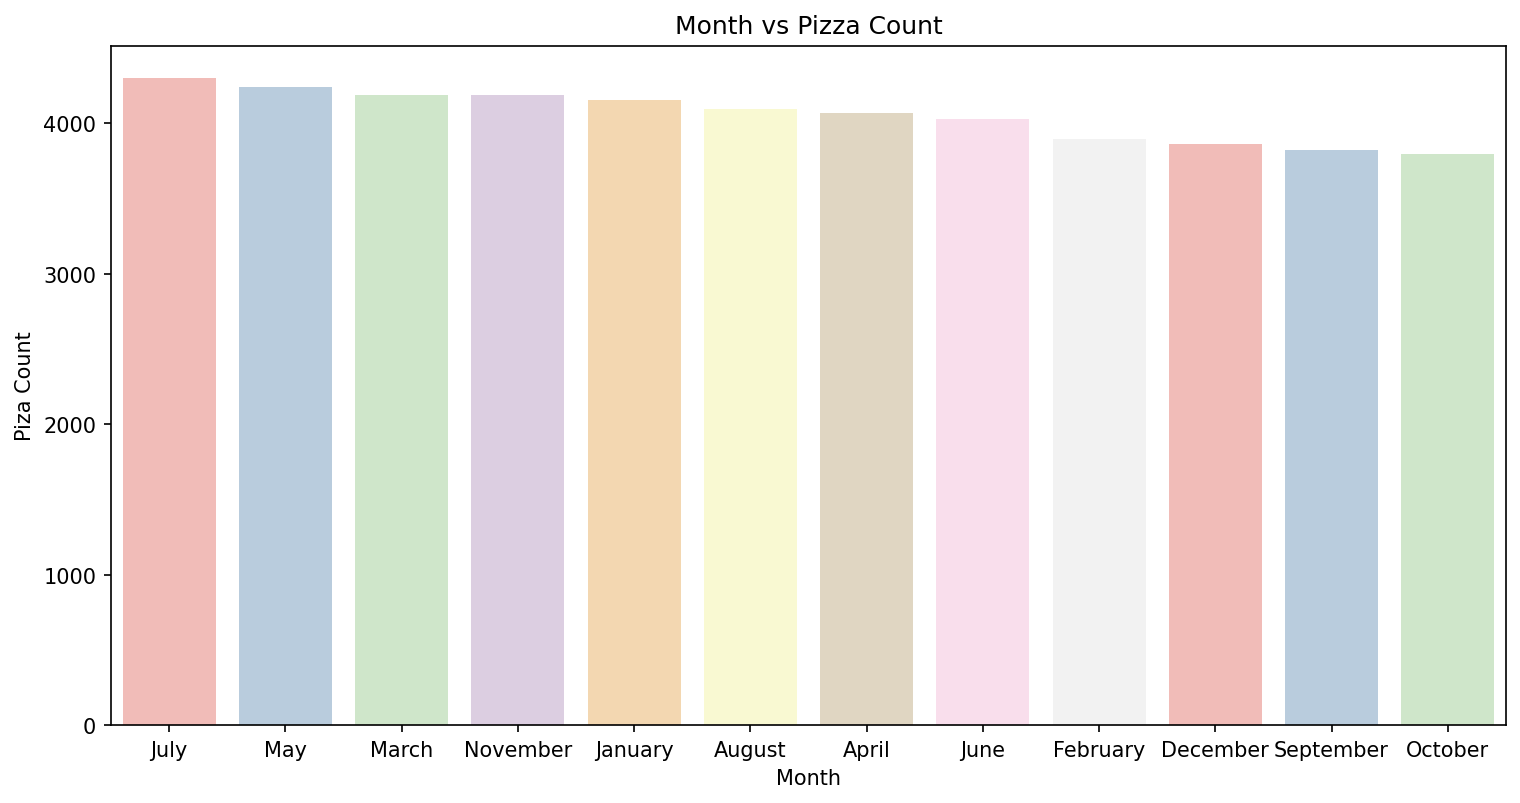

In [230]:
plt.figure(figsize=(12,6),dpi=150)
sns.countplot(data=df, x='month',order=df['month'].value_counts().index, palette='Pastel1')
plt.xlabel("Month")
plt.ylabel("Piza Count")
plt.title("Month vs Pizza Count")
plt.show();

In [234]:
# order count per month
df['month'].value_counts()

July         4301
May          4239
March        4186
November     4185
January      4156
August       4094
April        4067
June         4025
February     3892
December     3859
September    3819
October      3797
Name: month, dtype: int64

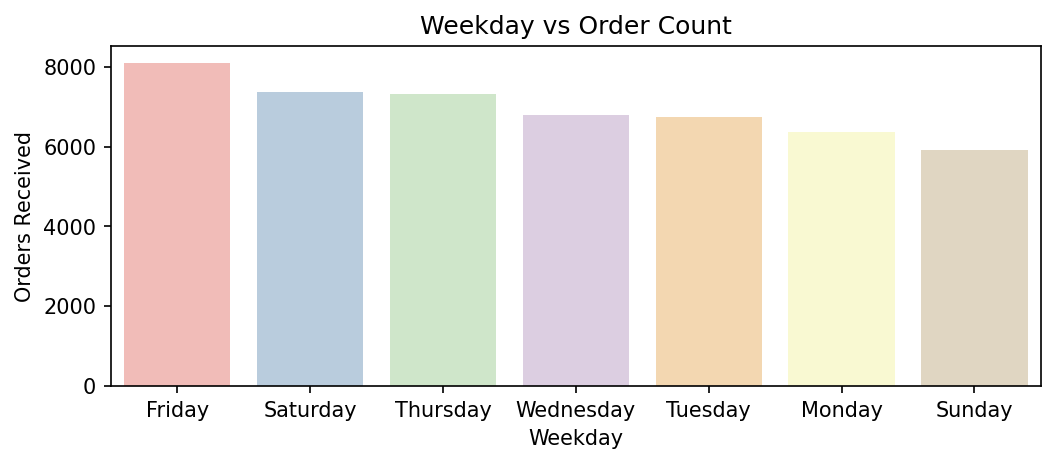

In [225]:
# order count per weekday 

plt.figure(figsize=(8,3),dpi=150)
sns.countplot(data=df, x='weekday',order=df['weekday'].value_counts().index, palette='Pastel1')
plt.xlabel("Weekday")
plt.ylabel("Orders Received")
plt.title("Weekday vs Order Count")
plt.show();

In [227]:
# order count per weekday

df['weekday'].value_counts()

Friday       8106
Saturday     7355
Thursday     7323
Wednesday    6797
Tuesday      6753
Monday       6369
Sunday       5917
Name: weekday, dtype: int64

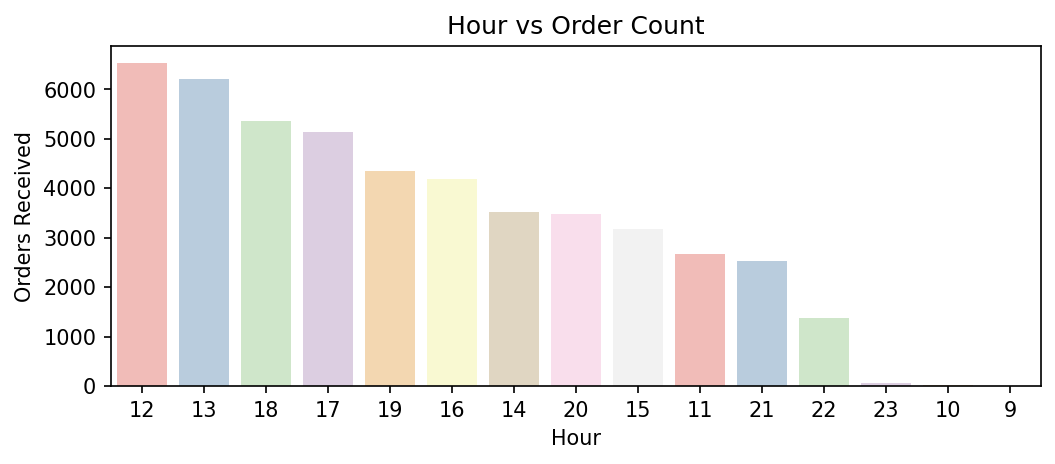

In [226]:
plt.figure(figsize=(8,3),dpi=150)

sns.countplot(data=df, x='order_hour',order=df['order_hour'].value_counts().index, palette="Pastel1")
plt.xlabel("Hour")
plt.ylabel("Orders Received")
plt.title("Hour vs Order Count")
plt.show();

In [96]:
# order count per hour

df['order_hour'].value_counts()

12    6543
13    6203
18    5359
17    5143
19    4350
16    4185
14    3521
20    3487
15    3170
11    2672
21    2528
22    1370
23      68
10      17
9        4
Name: order_hour, dtype: int64

## 2. How many pizzas are we making during peak periods?

In [94]:
df.groupby(['order_hour'])['quantity'].sum().sort_values(ascending=False)

order_hour
12    6776
13    6413
18    5417
17    5211
19    4406
16    4239
14    3613
20    3534
15    3216
11    2728
21    2545
22    1386
23      68
10      18
9        4
Name: quantity, dtype: int64

In [97]:
print('Total Pizza Count for 12-1pm:')
df.groupby(['order_hour'])['quantity'].sum().sort_values(ascending=False)[:2].sum()

Total Pizza Count for 12-1pm:


13189

In [98]:
print('Total Pizza Count for 5-6pm:')
df.groupby(['order_hour'])['quantity'].sum().sort_values(ascending=False)[2:4].sum()

Total Pizza Count for 5-6pm:


10628

In [167]:
# pizza count per hour on Friday
grouped = df.groupby(['weekday','order_hour'])['quantity'].sum()
grouped.filter(like='Friday',axis=0).sort_values(ascending=False)

weekday  order_hour
Friday   12            1101
         13            1040
         18             936
         17             759
         19             748
         20             706
         21             613
         16             578
         14             525
         15             441
         11             388
         22             381
         23              26
Name: quantity, dtype: int64

## 3. What are our best and worst-selling pizzas?

In [183]:
print('Top 3 Best_Selling Pizza (by name):')
df.groupby(['pizza_name'])['quantity'].sum().sort_values(ascending=False)[:3]

Top 3 Best_Selling Pizza (by name):


pizza_name
The Classic Deluxe Pizza      2453
The Barbecue Chicken Pizza    2432
The Hawaiian Pizza            2422
Name: quantity, dtype: int64

In [184]:
print('Top 3 Worst-Selling Pizza (by name):')
df.groupby(['pizza_name'])['quantity'].sum().sort_values()[:3]

Top 3 Worst-Selling Pizza (by name):


pizza_name
The Brie Carre Pizza       490
The Mediterranean Pizza    934
The Calabrese Pizza        937
Name: quantity, dtype: int64

In [185]:
print('Top 3 Best_Selling Pizza (by id):')
df.groupby(['pizza_id'])['quantity'].sum().sort_values(ascending=False)[:3]

Top 3 Best_Selling Pizza (by id):


pizza_id
big_meat_s       1914
thai_ckn_l       1410
five_cheese_l    1409
Name: quantity, dtype: int64

In [186]:
print('Top 3 Best_Selling Pizza (by id):')
df.groupby(['pizza_id'])['quantity'].sum().sort_values()[:3]

Top 3 Best_Selling Pizza (by id):


pizza_id
the_greek_xxl     28
green_garden_l    95
ckn_alfredo_s     96
Name: quantity, dtype: int64

In [237]:
print('Pizza Count by Category:')
df.groupby(['pizza_category'])['quantity'].sum().sort_values(ascending=False)

Pizza Count by Category:


pizza_category
Classic    14888
Supreme    11987
Veggie     11649
Chicken    11050
Name: quantity, dtype: int64

## 4. What's our average order value?

In [192]:
# avg order value per year
avg = [df['total_price'].sum()/df['order_id'].max()]
print('Yearly average order value:', avg)

Yearly average order value: [38.30726229508197]


In [194]:
total_order_month = df.groupby('month')['order_id'].nunique().reset_index()
total_pizza_month = df.groupby('month')['quantity'].sum().reset_index()
total_price_month = df.groupby('month')['total_price'].sum().reset_index()
average_month = (total_price_month['total_price']/total_order_month['order_id'])
monthly_sales = pd.DataFrame(zip(total_order_month.month, total_order_month.order_id, total_pizza_month.quantity, total_price_month.total_price, average_month))
monthly_sales.columns = ['Month','Orders', 'Total Pizza Sales', 'Total Price', 'Average Order Value']
print('Monthly Sales & Avg Order Value:')
monthly_sales

Monthly Sales & Avg Order Value:


,Month,Orders,Total Pizza Sales,Total Price,Average Order Value
0,April,1799,4151,68736.80,38.208338
1,August,1841,4168,68278.25,37.087588
2,December,1680,3935,64701.15,38.512589
3,February,1685,3961,65159.60,38.670386
4,January,1845,4232,69793.30,37.828347
5,July,1935,4392,72557.90,37.497623
6,June,1773,4107,68230.20,38.482910
7,March,1840,4261,70397.10,38.259293
8,May,1853,4328,71402.75,38.533594
9,November,1792,4266,70395.35,39.283119


## 5. How well are we utilizing our seating capacity? (we have 15 tables and 60 seats)

In [239]:
df['quantity'].value_counts()

1    47693
2      903
3       21
4        3
Name: quantity, dtype: int64

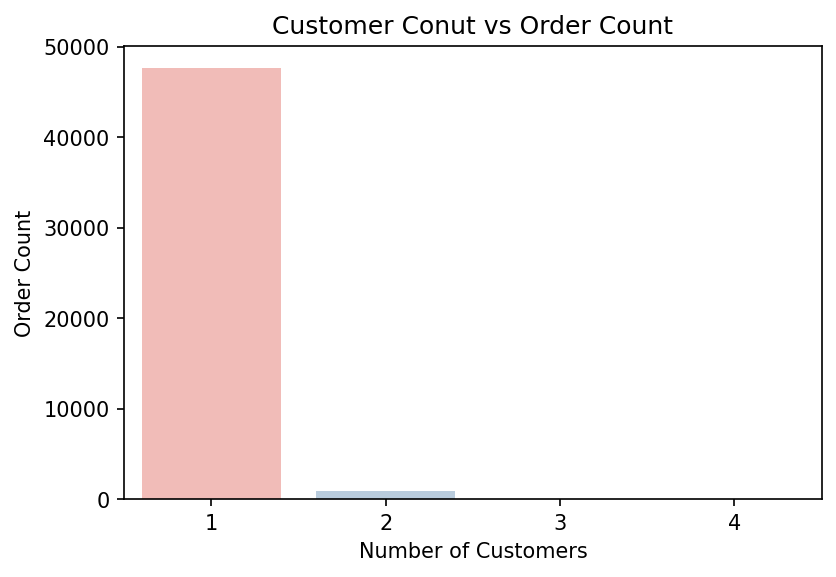

In [254]:
plt.figure(figsize=(6,4),dpi=150)

sns.countplot(data=df, x='quantity',order=df['quantity'].value_counts().index, palette="Pastel1")
plt.xlabel("Number of Customers")
plt.ylabel("Order Count")
plt.title("Customer Conut vs Order Count")
plt.show();

### Number of customers per order range between 1-4 with 1 being the most. Seat capacity is being well-utilized.